In [26]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [23]:
import pandas as pd

df_2016 = pd.read_excel("C:/Users/kimso/Desktop/capstone_data.xlsx", "2016 20대 총선")
df_2016

,선거구,선거구 비율,인구,면적(㎢),인구밀도(명/㎢),1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,투표율
전국,253,1.000000,51514090,100387.25,514.97,34042,34167,18520,16276,NaN
서울특별시,49,0.193676,10022181,605.20,16408.92,39356,44111,21295,19203,59.8
부산광역시,18,0.071146,3498529,769.87,4544.31,24815,26883,17525,16242,55.4
대구광역시,12,0.047431,2487829,883.56,2811.98,21602,25551,17848,16214,54.8
인천광역시,13,0.051383,2925815,1062.60,2769.69,29120,29689,17222,14873,55.6
광주광역시,8,0.031621,1472199,501.25,2931.10,24511,27373,18232,16155,61.6
대전광역시,7,0.027668,1518775,539.35,2807.77,25606,28124,18741,16020,58.6
울산광역시,6,0.023715,1173534,1060.80,1105.11,64021,52205,21422,17056,59.2
세종특별자치시,1,0.003953,210884,464.87,522.83,42572,41018,21000,17040,63.5
경기도,60,0.237154,12522606,10183.46,1248.77,32336,34591,18611,16194,57.5


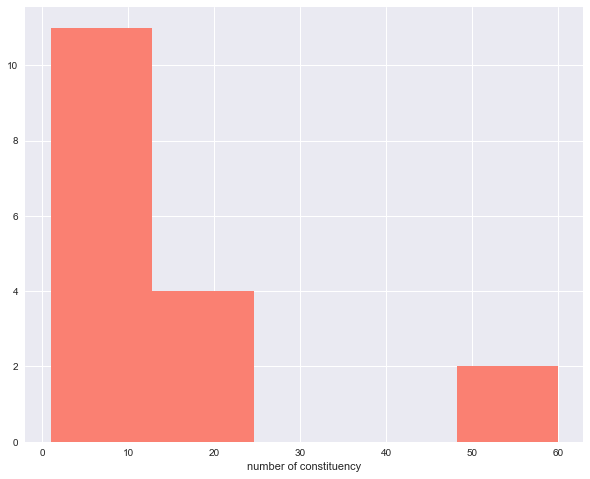

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df_2016_use=df_2016.drop(['전국'])

sns.set(rc={'figure.figsize':(10,8)})
plt.hist(df_2016_use['선거구'],bins=5,color='salmon')
plt.xlabel("number of constituency")
plt.show()

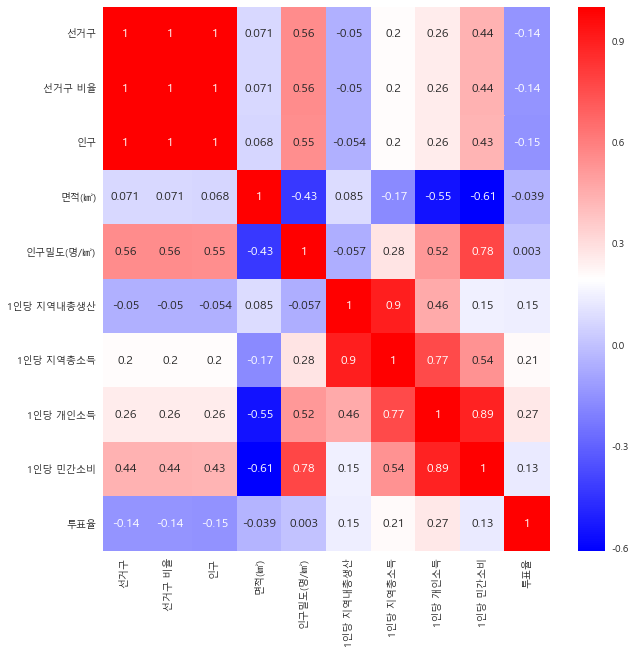

In [27]:
plt.figure(figsize=(10,10))
correlation_matrix=df_2016_use.corr().round(3)
sns.heatmap(data=correlation_matrix,annot=True, cmap='bwr')

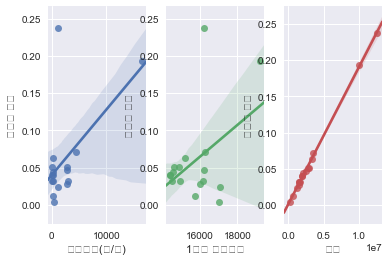

In [5]:
sns.set_style('darkgrid')
fig,axs=plt.subplots(ncols=3)
sns.regplot(x='인구밀도(명/㎢)',y='선거구 비율',data=df_2016_use,ax=axs[0])
sns.regplot(x='1인당 민간소비',y='선거구 비율',data=df_2016_use,ax=axs[1])
sns.regplot(x='인구',y='선거구 비율',data=df_2016_use,ax=axs[2])

In [9]:
import numpy as np

x_population=df_2016_use['인구']
y_district=df_2016_use['선거구 비율']

x_population=np.array(x_population).reshape(-1,1)

print(x_population.shape)
print(y_district.shape)

(17, 1)
(17,)


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
                    train_test_split(x_population,y_district,test_size=0.2,random_state=13)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13, 1)
(4, 1)
(13,)
(4,)


In [13]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
from sklearn.metrics import mean_squared_error

y_train_predict=reg.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))

print("The model performance for training set")
print("RMSE is",rmse)

The model performance for training set
RMSE is 0.002278466894797862


In [15]:
y_test_predict=reg.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))

print("The model performance for test set")
print("RMSE is",rmse)

The model performance for test set
RMSE is 0.002866978476643912


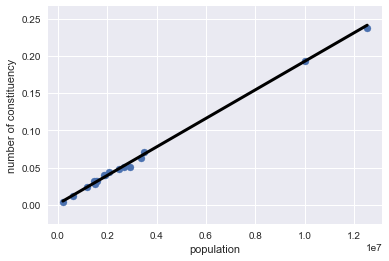

In [16]:
prediction_space=np.linspace(min(x_population),max(x_population)).reshape(-1,1)
plt.scatter(x_population,y_district)
plt.plot(prediction_space, reg.predict(prediction_space), color='black',linewidth=3)
plt.ylabel("number of constituency")
plt.xlabel("population")
plt.show()

In [28]:
df_2016_use=df_2016_use.drop('선거구',axis=1)
x=df_2016_use.drop('선거구 비율',axis=1)
y=df_2016_use['선거구 비율']

x_train, x_test, y_train, y_test = \
                    train_test_split(x,y,test_size=0.2,random_state=13)
    
reg_all=LinearRegression()
reg_all.fit(x_train,y_train)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_train_predict=reg_all.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))

print("The model performance for training set")
print("RMSE is",rmse)

The model performance for training set
RMSE is 0.0005387682495847542


In [31]:
y_test_predict=reg_all.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))

print("The model performance for test set")
print("RMSE is",rmse)

The model performance for test set
RMSE is 0.004831172737006837


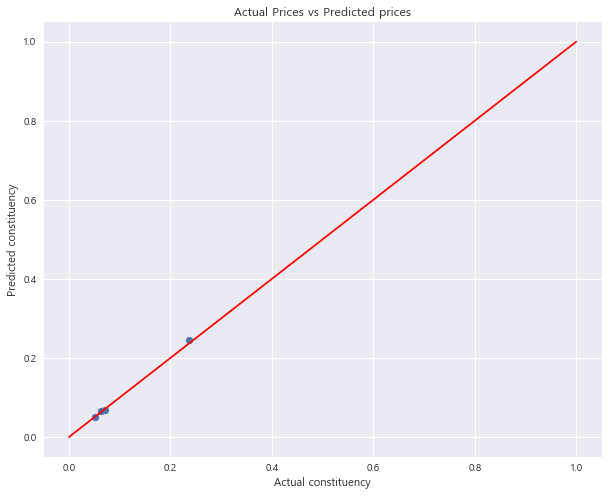

In [34]:
plt.scatter(y_test,y_test_predict)
plt.xlabel("Actual constituency")
plt.ylabel("Predicted constituency")
plt.title("Actual Prices vs Predicted prices")
plt.plot([0,1],[0,1],'r')